# Spaceship Titanic

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression

## Loading the data

In [2]:
train_data_csv = pd.read_csv("data/train.csv")
test_data_csv = pd.read_csv("data/test.csv")

## Looking at the data

In [3]:
train_data_csv.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


<Axes: xlabel='Transported'>

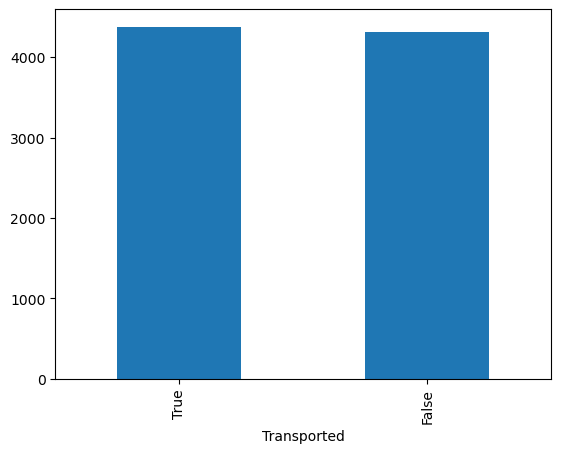

In [4]:
plot_df = train_data_csv.Transported.value_counts()
plot_df.plot(kind="bar")

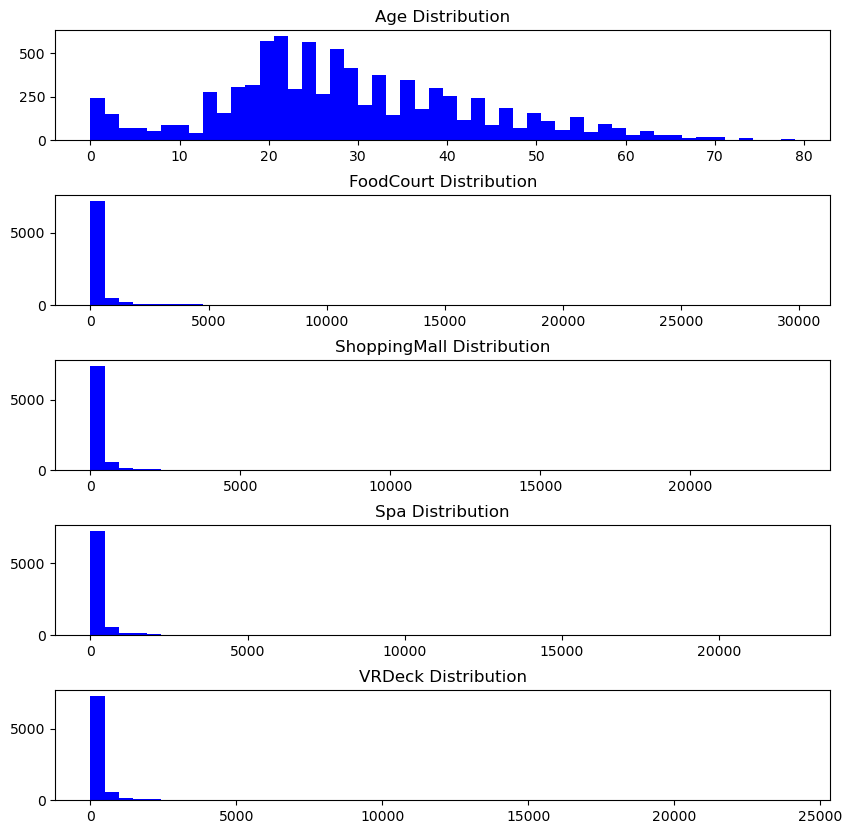

In [5]:
fig, ax = plt.subplots(5, 1, figsize=(10, 10))
plt.subplots_adjust(hspace=0.5)  # adjust vertical spacing as needed

# Looking at the numerical distribution
ax[0].hist(train_data_csv['Age'].dropna(), bins=50, color='b')
ax[0].set_title('Age Distribution')

ax[1].hist(train_data_csv['FoodCourt'].dropna(), bins=50, color='b')
ax[1].set_title('FoodCourt Distribution')

ax[2].hist(train_data_csv['ShoppingMall'].dropna(), bins=50, color='b')
ax[2].set_title('ShoppingMall Distribution')

ax[3].hist(train_data_csv['Spa'].dropna(), bins=50, color='b')
ax[3].set_title('Spa Distribution')

ax[4].hist(train_data_csv['VRDeck'].dropna(), bins=50, color='b')
ax[4].set_title('VRDeck Distribution')

plt.show()

Dropping passangerid and name

In [6]:
## Dropping columns
#train_data_csv = train_data_csv.drop(['PassengerId'], axis=1)
train_data_csv = train_data_csv.drop(['Name'], axis=1)
test_data_csv = test_data_csv.drop(['Name'], axis=1) #Removing same col from test data

# Adding splitting Cabin into deck num and side
train_data_csv[['Deck', 'Num', 'Side']] = train_data_csv['Cabin'].str.split('/', expand=True) 
train_data_csv.drop(columns=['Cabin'], inplace=True)

# For test data
test_data_csv[['Deck', 'Num', 'Side']] = test_data_csv['Cabin'].str.split('/', expand=True) 
test_data_csv.drop(columns=['Cabin'], inplace=True)

In [7]:
train_data_csv.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [8]:
train_data_csv.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S


Changing boolean values to binary 0 and 1

In [9]:
# Convert boolean columns to integers
encode_columns = ['HomePlanet', 'Destination', 'Deck', 'Side']

bool_columns = ['CryoSleep', 'VIP', 'Transported']
train_data_csv[bool_columns] = train_data_csv[bool_columns].fillna(False)
train_data_csv[bool_columns] = train_data_csv[bool_columns].astype(int)
train_data_csv = pd.get_dummies(train_data_csv, columns=encode_columns, dtype=int)

#Do the same for test data
bool_columns_test = ['CryoSleep', 'VIP']
test_data_csv[bool_columns_test] = test_data_csv[bool_columns_test].fillna(False)
test_data_csv[bool_columns_test] = test_data_csv[bool_columns_test].astype(int)
test_data_csv = pd.get_dummies(test_data_csv, columns=encode_columns, dtype=int)

#train_data_csv.head()
print(train_data_csv.columns)
test_data_csv.head()

Index(['PassengerId', 'CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt',
       'ShoppingMall', 'Spa', 'VRDeck', 'Transported', 'Num',
       'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars',
       'Destination_55 Cancri e', 'Destination_PSO J318.5-22',
       'Destination_TRAPPIST-1e', 'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D',
       'Deck_E', 'Deck_F', 'Deck_G', 'Deck_T', 'Side_P', 'Side_S'],
      dtype='object')


/var/folders/jh/kw53zzdn5yd5gwmw471z_8z00000gn/T/ipykernel_18585/2931602539.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data_csv[bool_columns] = train_data_csv[bool_columns].fillna(False)
/var/folders/jh/kw53zzdn5yd5gwmw471z_8z00000gn/T/ipykernel_18585/2931602539.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_data_csv[bool_columns_test] = test_data_csv[bool_columns_test].fillna(False)


,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Num,...,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S
0,0013_01,1,27.0,0,0.0,0.0,0.0,0.0,0.0,3,...,0,0,0,0,0,0,1,0,0,1
1,0018_01,0,19.0,0,0.0,9.0,0.0,2823.0,0.0,4,...,0,0,0,0,0,1,0,0,0,1
2,0019_01,1,31.0,0,0.0,0.0,0.0,0.0,0.0,0,...,0,0,1,0,0,0,0,0,0,1
3,0021_01,0,38.0,0,0.0,6652.0,0.0,181.0,585.0,1,...,0,0,1,0,0,0,0,0,0,1
4,0023_01,0,20.0,0,10.0,0.0,635.0,0.0,0.0,5,...,0,0,0,0,0,1,0,0,0,1


In [10]:
missing_values = train_data_csv.isna().sum()
print(missing_values)
train_data_csv['Num'] = train_data_csv['Num'].fillna(0) ## Why do i do this?
test_data_csv['Num'] = test_data_csv['Num'].fillna(0) ## Why do i do this?
train_data_csv.head()

PassengerId                    0
CryoSleep                      0
Age                          179
VIP                            0
RoomService                  181
FoodCourt                    183
ShoppingMall                 208
Spa                          183
VRDeck                       188
Transported                    0
Num                          199
HomePlanet_Earth               0
HomePlanet_Europa              0
HomePlanet_Mars                0
Destination_55 Cancri e        0
Destination_PSO J318.5-22      0
Destination_TRAPPIST-1e        0
Deck_A                         0
Deck_B                         0
Deck_C                         0
Deck_D                         0
Deck_E                         0
Deck_F                         0
Deck_G                         0
Deck_T                         0
Side_P                         0
Side_S                         0
dtype: int64


,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,...,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S
0,0001_01,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,...,0,1,0,0,0,0,0,0,1,0
1,0002_01,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,...,0,0,0,0,0,1,0,0,0,1
2,0003_01,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,...,1,0,0,0,0,0,0,0,0,1
3,0003_02,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,...,1,0,0,0,0,0,0,0,0,1
4,0004_01,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,...,0,0,0,0,0,1,0,0,0,1


In [11]:
print(train_data_csv.dtypes)

PassengerId                   object
CryoSleep                      int64
Age                          float64
VIP                            int64
RoomService                  float64
FoodCourt                    float64
ShoppingMall                 float64
Spa                          float64
VRDeck                       float64
Transported                    int64
Num                           object
HomePlanet_Earth               int64
HomePlanet_Europa              int64
HomePlanet_Mars                int64
Destination_55 Cancri e        int64
Destination_PSO J318.5-22      int64
Destination_TRAPPIST-1e        int64
Deck_A                         int64
Deck_B                         int64
Deck_C                         int64
Deck_D                         int64
Deck_E                         int64
Deck_F                         int64
Deck_G                         int64
Deck_T                         int64
Side_P                         int64
Side_S                         int64
d

In [12]:
convert_dict = {'Num':int}
train_data_csv = train_data_csv.astype(dtype=convert_dict)
test_data_csv = test_data_csv.astype(dtype=convert_dict)
print(train_data_csv.dtypes)

PassengerId                   object
CryoSleep                      int64
Age                          float64
VIP                            int64
RoomService                  float64
FoodCourt                    float64
ShoppingMall                 float64
Spa                          float64
VRDeck                       float64
Transported                    int64
Num                            int64
HomePlanet_Earth               int64
HomePlanet_Europa              int64
HomePlanet_Mars                int64
Destination_55 Cancri e        int64
Destination_PSO J318.5-22      int64
Destination_TRAPPIST-1e        int64
Deck_A                         int64
Deck_B                         int64
Deck_C                         int64
Deck_D                         int64
Deck_E                         int64
Deck_F                         int64
Deck_G                         int64
Deck_T                         int64
Side_P                         int64
Side_S                         int64
d

We should split "Cabin" into 3 variables: deck num side.

Check how many missing values there are for the numeric values when cryosleep is True

In [13]:
columns_of_interest = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
missing_overall = train_data_csv[columns_of_interest].isna().sum()
print("Missing values overall:")
print(missing_overall)
cryosleep_true_df = train_data_csv[train_data_csv['CryoSleep'] == True]

missing_cryosleep_true = cryosleep_true_df[columns_of_interest].isna().sum()
print("\nMissing values when CryoSleep is True:")
print(missing_cryosleep_true)

Missing values overall:
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
dtype: int64

Missing values when CryoSleep is True:
RoomService     68
FoodCourt       70
ShoppingMall    96
Spa             65
VRDeck          62
dtype: int64


In [14]:
numeric_cols = cryosleep_true_df.select_dtypes(include=['number'])
numeric_cols.describe()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Num,...,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S
count,3037.0,2955.000000,3037.000000,2969.0,2967.0,2941.0,2972.0,2975.0,3037.000000,3037.000000,...,3037.000000,3037.000000,3037.000000,3037.000000,3037.000000,3037.000000,3037.000000,3037.0,3037.000000,3037.000000
mean,1.0,27.405415,0.006915,0.0,0.0,0.0,0.0,0.0,0.817583,558.481067,...,0.022391,0.137965,0.096806,0.034244,0.055318,0.181100,0.444518,0.0,0.467567,0.504774
std,0.0,15.080469,0.082880,0.0,0.0,0.0,0.0,0.0,0.386251,488.433414,...,0.147974,0.344920,0.295742,0.181886,0.228637,0.385164,0.496994,0.0,0.499029,0.500060
min,1.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,1.0,18.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,146.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
50%,1.0,26.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,369.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000
75%,1.0,37.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,943.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,1.000000,1.000000
max,1.0,78.000000,1.000000,0.0,0.0,0.0,0.0,0.0,1.000000,1888.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000


We can see that the median value is 0 for all numeric values when Cryosleep is True. We can conclude that we can fill all missing values with 0.

In [15]:
missing_values = train_data_csv.isna().sum()
print(missing_values)

PassengerId                    0
CryoSleep                      0
Age                          179
VIP                            0
RoomService                  181
FoodCourt                    183
ShoppingMall                 208
Spa                          183
VRDeck                       188
Transported                    0
Num                            0
HomePlanet_Earth               0
HomePlanet_Europa              0
HomePlanet_Mars                0
Destination_55 Cancri e        0
Destination_PSO J318.5-22      0
Destination_TRAPPIST-1e        0
Deck_A                         0
Deck_B                         0
Deck_C                         0
Deck_D                         0
Deck_E                         0
Deck_F                         0
Deck_G                         0
Deck_T                         0
Side_P                         0
Side_S                         0
dtype: int64


We can "fill in" the missing values for age using the mean value of the column or similar, we remove the rest.

In [16]:
mean_age = train_data_csv['Age'].mean()
median_room_service = train_data_csv['RoomService'].median()
median_food_court = train_data_csv['FoodCourt'].median()
median_shopping_mall = train_data_csv['ShoppingMall'].median()
median_spa = train_data_csv['Spa'].median()
median_vrdeck = train_data_csv['VRDeck'].median()

train_data_csv['Age'] = train_data_csv['Age'].fillna(value=mean_age)
train_data_csv['RoomService'] = train_data_csv['RoomService'].fillna(value=median_room_service)
train_data_csv['FoodCourt'] = train_data_csv['FoodCourt'].fillna(value=median_food_court)
train_data_csv['ShoppingMall'] = train_data_csv['ShoppingMall'].fillna(value=median_shopping_mall)
train_data_csv['Spa'] = train_data_csv['Spa'].fillna(value=median_spa)
train_data_csv['VRDeck'] = train_data_csv['VRDeck'].fillna(value=median_vrdeck)

# For test data
mean_age_test = test_data_csv['Age'].mean()
median_room_service_test = test_data_csv['RoomService'].median()
median_food_court_test = test_data_csv['FoodCourt'].median()
median_shopping_mall_test = test_data_csv['ShoppingMall'].median()
median_spa_test = test_data_csv['Spa'].median()
median_vrdeck_test = test_data_csv['VRDeck'].median()

test_data_csv['Age'] = test_data_csv['Age'].fillna(value=mean_age_test)
test_data_csv['RoomService'] = test_data_csv['RoomService'].fillna(value=median_room_service_test)
test_data_csv['FoodCourt'] = test_data_csv['FoodCourt'].fillna(value=median_food_court_test)
test_data_csv['ShoppingMall'] = test_data_csv['ShoppingMall'].fillna(value=median_shopping_mall_test)
test_data_csv['Spa'] = test_data_csv['Spa'].fillna(value=median_spa_test)
test_data_csv['VRDeck'] = test_data_csv['VRDeck'].fillna(value=median_vrdeck_test)

In [17]:
missing_values = train_data_csv.isna().sum()
print(missing_values)

PassengerId                  0
CryoSleep                    0
Age                          0
VIP                          0
RoomService                  0
FoodCourt                    0
ShoppingMall                 0
Spa                          0
VRDeck                       0
Transported                  0
Num                          0
HomePlanet_Earth             0
HomePlanet_Europa            0
HomePlanet_Mars              0
Destination_55 Cancri e      0
Destination_PSO J318.5-22    0
Destination_TRAPPIST-1e      0
Deck_A                       0
Deck_B                       0
Deck_C                       0
Deck_D                       0
Deck_E                       0
Deck_F                       0
Deck_G                       0
Deck_T                       0
Side_P                       0
Side_S                       0
dtype: int64


Temporary delete all missing values --> change this later

In [18]:
#train_data_csv.dropna(inplace=True)
print(len(train_data_csv.index))

8693


In [19]:
train_data_csv.head()

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,...,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S
0,0001_01,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,...,0,1,0,0,0,0,0,0,1,0
1,0002_01,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,...,0,0,0,0,0,1,0,0,0,1
2,0003_01,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,...,1,0,0,0,0,0,0,0,0,1
3,0003_02,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,...,1,0,0,0,0,0,0,0,0,1
4,0004_01,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,...,0,0,0,0,0,1,0,0,0,1


In [20]:
print(len(test_data_csv.index))

4277


In [21]:
SEED = 50

In [22]:
# Random forrest classifier

X = train_data_csv.drop('Transported', axis=1)
y = train_data_csv['Transported']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=SEED)

rf_model = RandomForestClassifier(n_estimators=1000, random_state=SEED)
rf_model.fit(X_train, y_train)

val_accuracy = rf_model.score(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy:.3f}")

rf_model.fit(X, y)

# Kaggle predictions
preds_test = rf_model.predict(test_data_csv)

# File to submit
submission = pd.DataFrame({
    'PassengerId': test_data_csv['PassengerId'], # This col needs to exist in test data!
    'Transported': preds_test.astype(bool)
})
submission.to_csv("rfc_submission.csv", index=False)
print("Submission file saved as submission.csv")

importances = rf_model.feature_importances_
feature_names = X.columns

# Pair them up and sort
feat_imp = sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)
for name, score in feat_imp:
    print(f"{name}: {score:.4f}")

Validation Accuracy: 0.804
Submission file saved as submission.csv
PassengerId: 0.1194
Num: 0.1184
Age: 0.1043
Spa: 0.0982
RoomService: 0.0903
VRDeck: 0.0884
CryoSleep: 0.0877
FoodCourt: 0.0768
ShoppingMall: 0.0670
HomePlanet_Earth: 0.0231
HomePlanet_Europa: 0.0155
Deck_E: 0.0125
Deck_G: 0.0122
Side_S: 0.0117
Deck_F: 0.0117
Side_P: 0.0112
Destination_TRAPPIST-1e: 0.0106
HomePlanet_Mars: 0.0093
Destination_55 Cancri e: 0.0087
Destination_PSO J318.5-22: 0.0062
Deck_C: 0.0055
Deck_B: 0.0049
Deck_D: 0.0030
VIP: 0.0019
Deck_A: 0.0017
Deck_T: 0.0000


In [23]:
# Decision tree classifier

X = train_data_csv.drop('Transported', axis=1)
y = train_data_csv['Transported']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=SEED)

dt_model = DecisionTreeClassifier(random_state=SEED)
dt_model.fit(X_train, y_train)

val_accuracy = dt_model.score(X_val, y_val)
print(f"[DecisionTree] Validation Accuracy: {val_accuracy:.3f}")

dt_model.fit(X, y)

preds_test_dt = dt_model.predict(test_data_csv)

submission_dt = pd.DataFrame({
    'PassengerId': test_data_csv['PassengerId'],  # column must exist in test data
    'Transported': preds_test_dt.astype(bool)      # 0/1 to True/False
})
submission_dt.to_csv("dt_submission.csv", index=False)
print("Submission file saved as dt_submission.csv")


[DecisionTree] Validation Accuracy: 0.754
Submission file saved as dt_submission.csv


In [24]:
# Logistic Regression Classifier
"""
X = train_data_csv.drop('Transported', axis=1)
y = train_data_csv['Transported']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=SEED)

lr_model = LogisticRegression(max_iter=1000, random_state=SEED)
lr_model.fit(X_train, y_train)

val_accuracy = lr_model.score(X_val, y_val)
print(f"[LogisticRegression] Validation Accuracy: {val_accuracy:.3f}")

lr_model.fit(X, y)

preds_test_lr = lr_model.predict(test_data_csv)

submission_lr = pd.DataFrame({
    'PassengerId': test_data_csv['PassengerId'],
    'Transported': preds_test_lr.astype(bool)
})
submission_lr.to_csv("lr_submission.csv", index=False)

print("Submission file saved as lr_submission.csv")
"""

'\nX = train_data_csv.drop(\'Transported\', axis=1)\ny = train_data_csv[\'Transported\']\n\nX_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=SEED)\n\nlr_model = LogisticRegression(max_iter=1000, random_state=SEED)\nlr_model.fit(X_train, y_train)\n\nval_accuracy = lr_model.score(X_val, y_val)\nprint(f"[LogisticRegression] Validation Accuracy: {val_accuracy:.3f}")\n\nlr_model.fit(X, y)\n\npreds_test_lr = lr_model.predict(test_data_csv)\n\nsubmission_lr = pd.DataFrame({\n    \'PassengerId\': test_data_csv[\'PassengerId\'],\n    \'Transported\': preds_test_lr.astype(bool)\n})\nsubmission_lr.to_csv("lr_submission.csv", index=False)\n\nprint("Submission file saved as lr_submission.csv")\n'